# ***MODEL***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install ultralytics

In [ ]:
import numpy as np
np.random.seed(42)

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/best.pt')

In [ ]:
# Exécuter la prédiction sur une seule image
result = model.predict('/content/drive/MyDrive/Augmented_data_split_2000/test/bkl')

In [ ]:
for index_image in range(len(result)):
    image_result = result[index_image]

    # Accès à la classe prédite
    index_classe = image_result.probs.top5[0]
    classe_predite = image_result.names[index_classe]
    print("Type prédit :", classe_predite)

In [ ]:
# Définir la classe réelle attendue pour toutes les images
classe_reelle = "bkl"  # Remplacez ceci par la classe réelle attendue

for index_image in range(len(result)):
    image_result = result[index_image]

    # Accès à la classe prédite
    index_classe = image_result.probs.top5[0]
    classe_predite = image_result.names[index_classe]

    # Vérifier si la prédiction est correcte
    if classe_predite == classe_reelle:
        # Imprimer le nom de l'image si la prédiction est incorrecte
        print(f"Prédiction correcte pour l'image: {image_result.path}")  # ou tout autre attribut représentant le nom de l'image
   # else:
       # print("Prédiction correcte")


# ***YOLO CAM***

In [ ]:
from ultralytics import YOLO
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [ ]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

In [ ]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git


Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 78 (delta 7), reused 11 (delta 3), pack-reused 57
Receiving objects: 100% (78/78), 29.77 MiB | 33.99 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
!pip install ttach

In [ ]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ISIC_0024307.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [ ]:

model = YOLO('/content/drive/MyDrive/datasets/runs/classify/train8/weights/best.pt')

In [ ]:
target_layers =[model.model.model[-2]]

In [ ]:
cam = EigenCAM(model, target_layers,task='cls')


0: 480x480 nv 1.00, df 0.00, mel 0.00, bkl 0.00, akiec 0.00, 44.1ms
Speed: 105.5ms preprocess, 44.1ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)


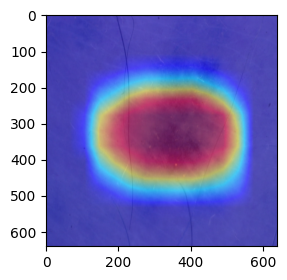

In [ ]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 480x480 nv 1.00, df 0.00, mel 0.00, bkl 0.00, akiec 0.00, 34.8ms
Speed: 43.8ms preprocess, 34.8ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)


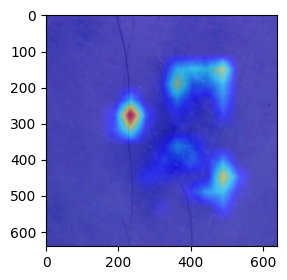

In [ ]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [ ]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]


0: 480x480 nv 1.00, df 0.00, mel 0.00, bkl 0.00, akiec 0.00, 35.4ms
Speed: 19.1ms preprocess, 35.4ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)


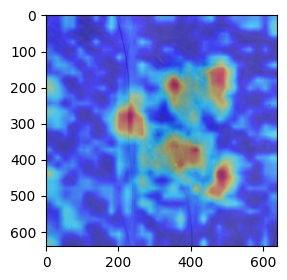

In [ ]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

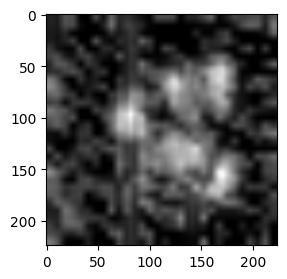

In [ ]:
g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224,224))

plt.imshow(g_scale, cmap='gray')
plt.show()

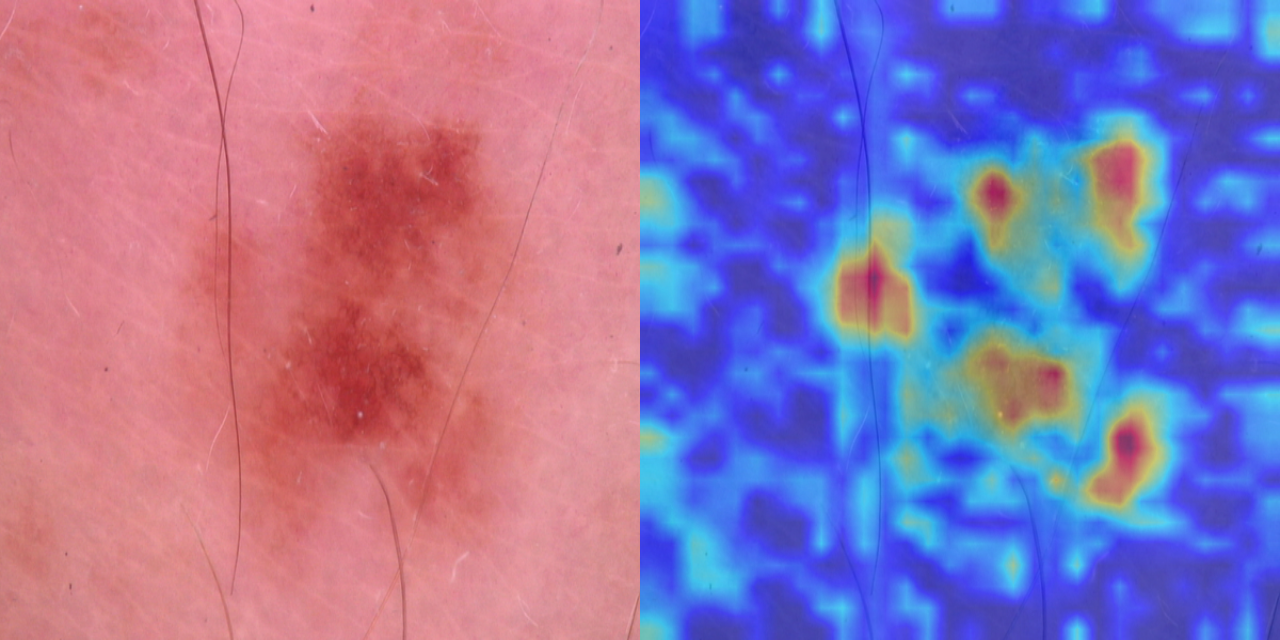

In [ ]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

# ***CAM TEST***

***CAM AKIEC***

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image
import os


# Définir la fonction pour appliquer EigenCAM
def apply_eigencam(image_path, model):
    plt.rcParams["figure.figsize"] = [3.0, 3.0]

    # Lecture et prétraitement de l'image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    target_layers = [model.model.model[-2], model.model.model[-3], model.model.model[-4]]

    # Application de EigenCAM
    cam = EigenCAM(model, target_layers, task='cls')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    # Affichage et enregistrement du résultat
    g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224, 224))
    plt.imshow(g_scale, cmap='gray')
    #plt.show()

    im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    combined_image = Image.fromarray(np.hstack((im, cam_image)))

    # Extraire le nom de base de l'image originale
    nom_base = os.path.basename(image_path)
    nom_fichier = f"result_{classe_predite}_{nom_base}"
    chemin_complet = f"/content/drive/MyDrive/result_cam_true/akiec/{nom_fichier}"

    # Enregistrer l'image résultante
    combined_image.save(chemin_complet)

# Boucle pour vérifier les prédictions et appliquer EigenCAM
classe_reelle = "akiec"
for index_image in range(len(result)):
    image_result = result[index_image]
    index_classe = image_result.probs.top5[0]
    classe_predite = image_result.names[index_classe]

    if classe_predite == classe_reelle:
        print(f"Prédiction correcte pour l'image: {image_result.path}")
        apply_eigencam(image_result.path, model)
    #else:
     #   print("Prédiction correcte")


***CAM BCC***

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image
import os


# Définir la fonction pour appliquer EigenCAM
def apply_eigencam(image_path, model):
    plt.rcParams["figure.figsize"] = [3.0, 3.0]

    # Lecture et prétraitement de l'image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    target_layers = [model.model.model[-2], model.model.model[-3], model.model.model[-4]]

    # Application de EigenCAM
    cam = EigenCAM(model, target_layers, task='cls')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    # Affichage et enregistrement du résultat
    g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224, 224))
    plt.imshow(g_scale, cmap='gray')
    #plt.show()

    im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    combined_image = Image.fromarray(np.hstack((im, cam_image)))

    # Extraire le nom de base de l'image originale
    nom_base = os.path.basename(image_path)
    nom_fichier = f"result_{classe_predite}_{nom_base}"
    chemin_complet = f"/content/drive/MyDrive/result_cam_true/bcc/{nom_fichier}"

    # Enregistrer l'image résultante
    combined_image.save(chemin_complet)

# Boucle pour vérifier les prédictions et appliquer EigenCAM
classe_reelle = "bcc"
for index_image in range(len(result)):
    image_result = result[index_image]
    index_classe = image_result.probs.top5[0]
    classe_predite = image_result.names[index_classe]

    if classe_predite == classe_reelle:
        print(f"Prédiction correcte pour l'image: {image_result.path}")
        apply_eigencam(image_result.path, model)
    #else:
     #   print("Prédiction correcte")

***CAM BKL***

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image
import os


# Définir la fonction pour appliquer EigenCAM
def apply_eigencam(image_path, model):
    plt.rcParams["figure.figsize"] = [3.0, 3.0]

    # Lecture et prétraitement de l'image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    target_layers = [model.model.model[-2], model.model.model[-3], model.model.model[-4]]

    # Application de EigenCAM
    cam = EigenCAM(model, target_layers, task='cls')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    # Affichage et enregistrement du résultat
    g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224, 224))
    plt.imshow(g_scale, cmap='gray')
    #plt.show()

    im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    combined_image = Image.fromarray(np.hstack((im, cam_image)))

    # Extraire le nom de base de l'image originale
    nom_base = os.path.basename(image_path)
    nom_fichier = f"result_{classe_predite}_{nom_base}"
    chemin_complet = f"/content/drive/MyDrive/result_cam_true/bkl/{nom_fichier}"

    # Enregistrer l'image résultante
    combined_image.save(chemin_complet)

# Boucle pour vérifier les prédictions et appliquer EigenCAM
classe_reelle = "bkl"
for index_image in range(len(result)):
    image_result = result[index_image]
    index_classe = image_result.probs.top5[0]
    classe_predite = image_result.names[index_classe]

    if classe_predite == classe_reelle:
        print(f"Prédiction correcte pour l'image: {image_result.path}")
        apply_eigencam(image_result.path, model)
    #else:
     #   print("Prédiction correcte")

***CAM DF***

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image
import os


# Définir la fonction pour appliquer EigenCAM
def apply_eigencam(image_path, model):
    plt.rcParams["figure.figsize"] = [3.0, 3.0]

    # Lecture et prétraitement de l'image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    target_layers = [model.model.model[-2], model.model.model[-3], model.model.model[-4]]

    # Application de EigenCAM
    cam = EigenCAM(model, target_layers, task='cls')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    # Affichage et enregistrement du résultat
    g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224, 224))
    plt.imshow(g_scale, cmap='gray')
    #plt.show()

    im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    combined_image = Image.fromarray(np.hstack((im, cam_image)))

    # Extraire le nom de base de l'image originale
    nom_base = os.path.basename(image_path)
    nom_fichier = f"result_{classe_predite}_{nom_base}"
    chemin_complet = f"/content/drive/MyDrive/result_cam_true/df/{nom_fichier}"

    # Enregistrer l'image résultante
    combined_image.save(chemin_complet)

# Boucle pour vérifier les prédictions et appliquer EigenCAM
classe_reelle = "df"
for index_image in range(len(result)):
    image_result = result[index_image]
    index_classe = image_result.probs.top5[0]
    classe_predite = image_result.names[index_classe]

    if classe_predite == classe_reelle:
        print(f"Prédiction correcte pour l'image: {image_result.path}")
        apply_eigencam(image_result.path, model)
    #else:
     #   print("Prédiction correcte")

***CAM MEL***

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image
import os


# Définir la fonction pour appliquer EigenCAM
def apply_eigencam(image_path, model):
    plt.rcParams["figure.figsize"] = [3.0, 3.0]

    # Lecture et prétraitement de l'image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    target_layers = [model.model.model[-2], model.model.model[-3], model.model.model[-4]]

    # Application de EigenCAM
    cam = EigenCAM(model, target_layers, task='cls')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    # Affichage et enregistrement du résultat
    g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224, 224))
    plt.imshow(g_scale, cmap='gray')
    #plt.show()

    im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    combined_image = Image.fromarray(np.hstack((im, cam_image)))

    # Extraire le nom de base de l'image originale
    nom_base = os.path.basename(image_path)
    nom_fichier = f"result_{classe_predite}_{nom_base}"
    chemin_complet = f"/content/drive/MyDrive/result_cam_true/mel/{nom_fichier}"

    # Enregistrer l'image résultante
    combined_image.save(chemin_complet)

# Boucle pour vérifier les prédictions et appliquer EigenCAM
classe_reelle = "mel"
for index_image in range(len(result)):
    image_result = result[index_image]
    index_classe = image_result.probs.top5[0]
    classe_predite = image_result.names[index_classe]

    if classe_predite == classe_reelle:
        print(f"Prédiction correcte pour l'image: {image_result.path}")
        apply_eigencam(image_result.path, model)
    #else:
     #   print("Prédiction correcte")

***CAM NV***

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image
import os


# Définir la fonction pour appliquer EigenCAM
def apply_eigencam(image_path, model):
    plt.rcParams["figure.figsize"] = [3.0, 3.0]

    # Lecture et prétraitement de l'image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    target_layers = [model.model.model[-2], model.model.model[-3], model.model.model[-4]]

    # Application de EigenCAM
    cam = EigenCAM(model, target_layers, task='cls')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    # Affichage et enregistrement du résultat
    g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224, 224))
    plt.imshow(g_scale, cmap='gray')
    #plt.show()

    im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    combined_image = Image.fromarray(np.hstack((im, cam_image)))

    # Extraire le nom de base de l'image originale
    nom_base = os.path.basename(image_path)
    nom_fichier = f"result_{classe_predite}_{nom_base}"
    chemin_complet = f"/content/drive/MyDrive/result_cam_true/nv/{nom_fichier}"

    # Enregistrer l'image résultante
    combined_image.save(chemin_complet)

# Boucle pour vérifier les prédictions et appliquer EigenCAM
classe_reelle = "nv"
for index_image in range(len(result)):
    image_result = result[index_image]
    index_classe = image_result.probs.top5[0]
    classe_predite = image_result.names[index_classe]

    if classe_predite == classe_reelle:
        print(f"Prédiction correcte pour l'image: {image_result.path}")
        apply_eigencam(image_result.path, model)
    #else:
     #   print("Prédiction correcte")

***CAM VASC***

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image
import os


# Définir la fonction pour appliquer EigenCAM
def apply_eigencam(image_path, model):
    plt.rcParams["figure.figsize"] = [3.0, 3.0]

    # Lecture et prétraitement de l'image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255

    target_layers = [model.model.model[-2], model.model.model[-3], model.model.model[-4]]

    # Application de EigenCAM
    cam = EigenCAM(model, target_layers, task='cls')
    grayscale_cam = cam(rgb_img)[0, :, :]
    cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

    # Affichage et enregistrement du résultat
    g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224, 224))
    plt.imshow(g_scale, cmap='gray')
    #plt.show()

    im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
    combined_image = Image.fromarray(np.hstack((im, cam_image)))

    # Extraire le nom de base de l'image originale
    nom_base = os.path.basename(image_path)
    nom_fichier = f"result_{classe_predite}_{nom_base}"
    chemin_complet = f"/content/drive/MyDrive/result_cam_true/vasc/{nom_fichier}"

    # Enregistrer l'image résultante
    combined_image.save(chemin_complet)

# Boucle pour vérifier les prédictions et appliquer EigenCAM
classe_reelle = "vasc"
for index_image in range(len(result)):
    image_result = result[index_image]
    index_classe = image_result.probs.top5[0]
    classe_predite = image_result.names[index_classe]

    if classe_predite == classe_reelle:
        print(f"Prédiction correcte pour l'image: {image_result.path}")
        apply_eigencam(image_result.path, model)
    #else:
     #   print("Prédiction correcte")